In [21]:
import numpy as np
import pydicom
from pydicom.pixel_data_handlers.util import apply_modality_lut
import matplotlib.pyplot as plt
from PIL import Image
def load_image_as_rgb(filepath):
    """
    Load an image (DICOM, PNG, JPG) and return its RGB data as a NumPy array.

    Args:
        filepath (str): Path to the image file.

    Returns:
        np.ndarray: RGB data as a NumPy array.
    """
    # Check file extension
    file_ext = filepath.split(".")[-1].lower()

    if file_ext in ["png", "jpg", "jpeg"]:
        # For PNG or JPG, use Pillow
        image = Image.open(filepath).convert("RGB")  # Ensure it's RGB
        return np.array(image)

    elif file_ext == "dcm":
        # For DICOM, use pydicom
        dicom_file = pydicom.dcmread(filepath)

        # Apply modality LUT if necessary to get pixel values
        image_data = apply_modality_lut(dicom_file.pixel_array, dicom_file)

        # Normalize to 0-255 for RGB conversion (if necessary)
        if np.max(image_data) > 255:
            image_data = (image_data / np.max(image_data)) * 255.0

        # Convert grayscale to RGB (if it's single-channel)
        if len(image_data.shape) == 2:  # Grayscale image
            image_data = np.stack([image_data] * 3, axis=-1)  # Convert to RGB

        return image_data.astype(np.uint8)

    else:
        raise ValueError(f"Unsupported file format: {file_ext}")

In [24]:
img =  load_image_as_rgb("/home/kadir/xl-vlms/playground/images/synpic32933.jpg")#
#img =  load_image_as_rgb("/netscratch/kadir/xl-vlms/sample_data/s50170763/45c2d42e-3fa8a9a7-57e79152-d1df9e4c-7d79da67.dcm")

img = img

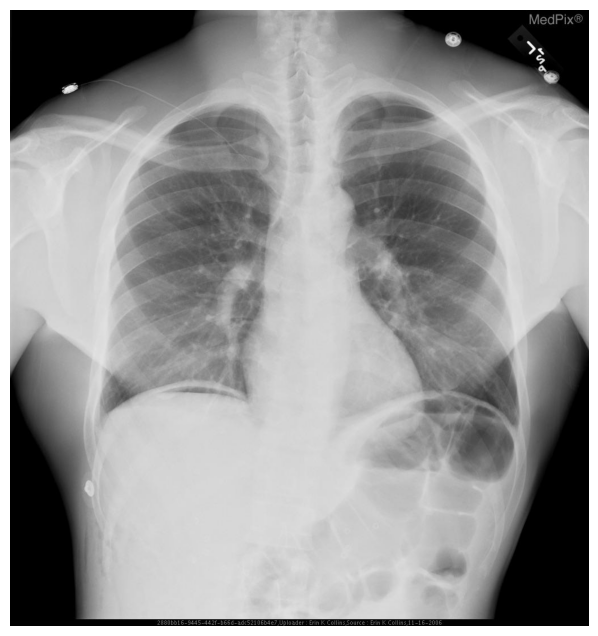

In [25]:
fig = plt.figure(figsize=(8, 8))
plt.imshow(img, cmap="gray")
plt.axis('off')  # Optional: Turn off the axis
plt.show()